### LIBRARIES

In [4]:
library(dplyr)
library(ggplot2)
library(reshape2)
library(patternplot)
library(tidyr)
library(scales)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'tidyr'

The following object is masked from 'package:reshape2':

    smiths



## GRAPH 1

In [23]:
graph1 = read.csv("WHO_NREVSS_Clinical_Labs.csv",header = TRUE)
gdata1 <- mutate(graph1,YEAR_WEEK=paste(YEAR, sprintf("%02d",WEEK),sep=""))
gdata1 <- subset(gdata1,(YEAR_WEEK<=201904))
gdata1.new <- subset(gdata1, select=c("TOTAL.A", "TOTAL.B", "YEAR_WEEK"))
gdata1.new1 <- melt(gdata1.new,id.var="YEAR_WEEK")

In [30]:
A_max = max(gdata1$TOTAL.A, na.rm = TRUE)
#print(A_max)

Per_max = max(gdata1$PERCENT.POSITIVE, na.rm = TRUE)
scale.point = (A_max/Per_max)-32
plt1 = ggplot(gdata1,aes(x=YEAR_WEEK))+ #facet_wrap(~ variable)+
  geom_bar(data=gdata1.new1,aes(x=YEAR_WEEK,y=value,fill=variable),stat="identity",color="black") + 
  scale_x_discrete(expand=expand_scale(mult = c(0, 0.6), add = c(1, 0)))+
  scale_y_continuous(name = expression("Number of Positive Specimen"),
                     breaks = (seq(0,15000,by=2000)),
                     expand=c(0,0),sec.axis = sec_axis(~.*1/scale.point,name = "Percent Positive"),limits=c(0,A_max+2000))+
  geom_line(aes(y=as.numeric((PERCENT.POSITIVE)*scale.point),group=1,color="Percent Positive"),linetype="solid",stat="identity", size=1)+
  geom_line(aes(y=as.numeric((PERCENT.A)*scale.point),group=1,color="% Positive Flu A"),linetype="dashed",stat="identity", size=0.6)+
  geom_line(aes(y=as.numeric((PERCENT.B)*scale.point),group=1,color="% Positive Flu B"),linetype="dotted",stat="identity", size=1)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(color = "black"),
        legend.position=c(0.85,0.8),legend.box="vertical",legend.title = element_blank(),
        legend.background = element_rect(fill="white",size=2),legend.text=element_text(size=8,face="bold"),
        axis.text.x = element_text(size=7,angle=45, hjust=1,face="bold"),
        axis.text.y = element_text(face="bold"),
        plot.title = element_text(size = 10, face = "bold", hjust=0.5))+
  scale_color_manual(name=c("% Positive Flu A","% Positive Flu B","Percent Positive"),values=c("red","blue","black"))+
  scale_fill_manual(name=c("A","B"),values=c("yellow","green"))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
National Summary, 2018-2019 Season",
      x="WEEK", caption="Source: CDC.gov")+
theme(plot.margin=unit(c(1,1,1.5,1),"cm"))
jpeg('rplot.jpg')
plt2
dev.off()

[1] 7840


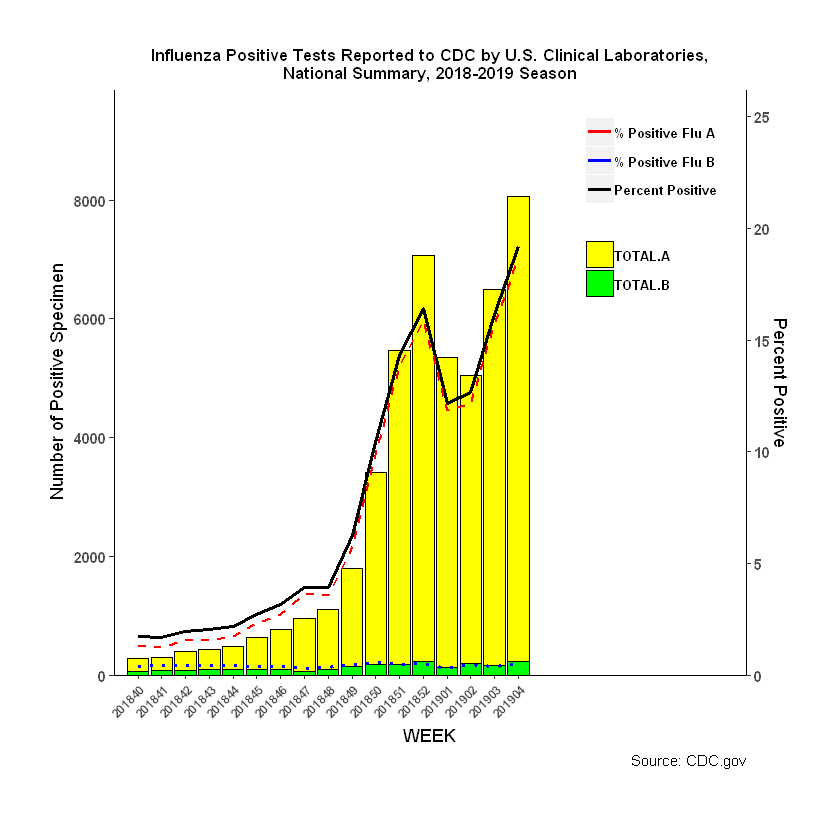

In [31]:
plt1

## GRAPH 2

In [39]:
gdata2 <- read.csv("WHO_NREVSS_Public_Health_Labs.csv",header=T)
gdata2.new <- mutate(gdata2,YEAR_WEEK=paste(YEAR, sprintf("%02d",WEEK),sep=""))
gdata2.new <- subset(gdata2.new,(YEAR_WEEK<=201904))
gdata2.temp <- subset(gdata2.new, select=c("A..Subtyping.not.Performed.", "A..2009.H1N1.", "A..H3.","B","BVic","BYam","H3N2v","YEAR_WEEK"))
gdata2.new1 <- melt(gdata2.temp,id.var="YEAR_WEEK")
gdata2


REGION.TYPE,REGION,YEAR,WEEK,TOTAL.SPECIMENS,A..2009.H1N1.,A..H3.,A..Subtyping.not.Performed.,B,BVic,BYam,H3N2v
National,X,2018,40,795,29,11,7,0,7,11,0
National,X,2018,41,900,52,11,7,5,3,5,0
National,X,2018,42,1090,51,21,13,1,2,14,0
National,X,2018,43,1102,74,35,3,3,0,13,0
National,X,2018,44,1228,84,23,2,1,1,8,0
National,X,2018,45,1310,117,27,14,4,4,7,0
National,X,2018,46,1400,147,40,9,0,2,3,0
National,X,2018,47,1106,211,53,9,1,2,5,0
National,X,2018,48,1681,321,63,9,1,2,10,0
National,X,2018,49,1690,355,89,14,8,3,7,0


In [40]:
plt2 <- ggplot(gdata2.new1,aes(x=YEAR_WEEK,y=value,fill=variable))+ 
        scale_x_discrete(expand=expand_scale(mult = c(0, 0.6), add = c(1, 0)))+
        scale_y_continuous(name = expression("number of positive specimen"),
                           breaks = seq(0,2500, by = 500),expand=c(0,0))+
        geom_bar(color="black",stat="identity")+
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(color = "black"),
        legend.position=c(0.9,0.8),legend.box="vertical",legend.title = element_blank(),
        legend.background = element_rect(fill="white",size=2),legend.text=element_text(size=8,face="bold"),
        axis.text.x = element_text(size=7,angle=45, hjust=1,face="bold"),
        axis.text.y = element_text(face="bold"),
        plot.title = element_text(size = 10, face = "bold", hjust=0.5))+
        scale_fill_manual(name=c("A","A(H1N1)2009","A(H3N2)","B","B(Victoria)","B(yamagata)","H3N2v"),
                          values=c("yellow","orange","red","darkgreen","lightgreen","green","violet"))+
        labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,
        National Summary, 2018-2019 Season",
      x="WEEK", caption="Source: CDC.gov")+
       theme(plot.margin=unit(c(1,1,1.5,3),"cm"))

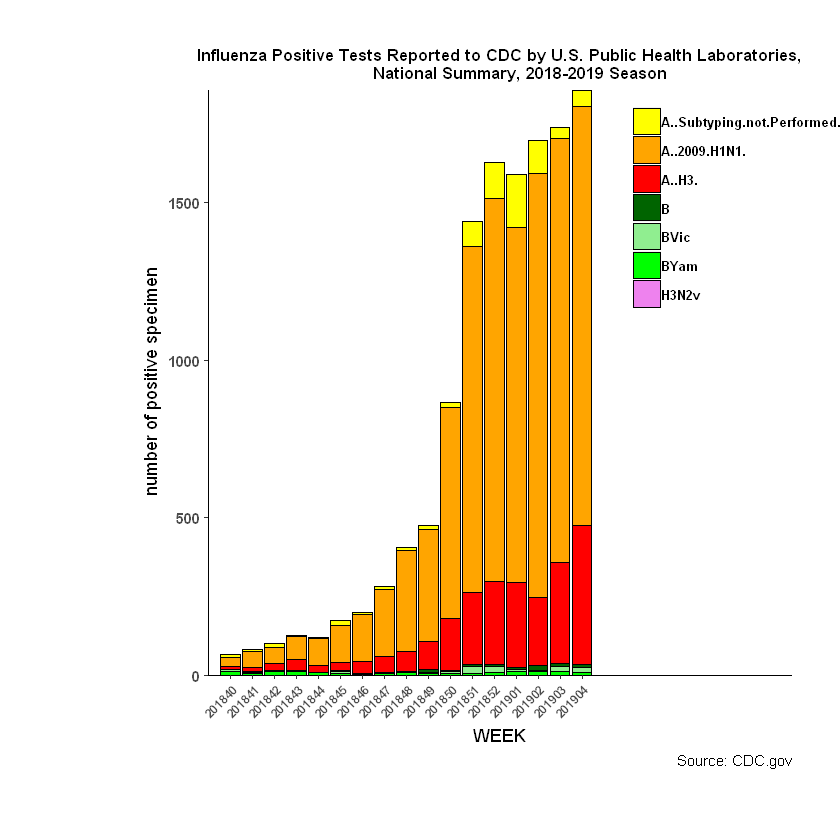

In [41]:
plt2

## GRAPH 3

In [9]:
library(plotrix)
gdata4 <- read.csv("Genetic07.csv",header=F)
gdata4.n <- gdata2
gdata4.1 <- c(sum(gdata4.n$A..2009.H1N1.),sum(gdata4.n$A..H3.),sum(gdata4.n$A..Subtyping.not.Performed.),sum(gdata4.n$B),sum(gdata4.n$BVic),sum(gdata4.n$BYam))



Attaching package: 'plotrix'

The following object is masked from 'package:scales':

    rescale



In [10]:
gdata4.B <- gdata4[1:3,3:5]
gdata4.A <- gdata4[6:8,3:5]
gdata4.Y <- gdata4[4,3:5] 
gdata4.P <- gdata4[5,3:5]

Warning message in cos(angles) * (radius + explode):
"longer object length is not a multiple of shorter object length"Warning message in sin(angles) * (yradius + explode):
"longer object length is not a multiple of shorter object length"

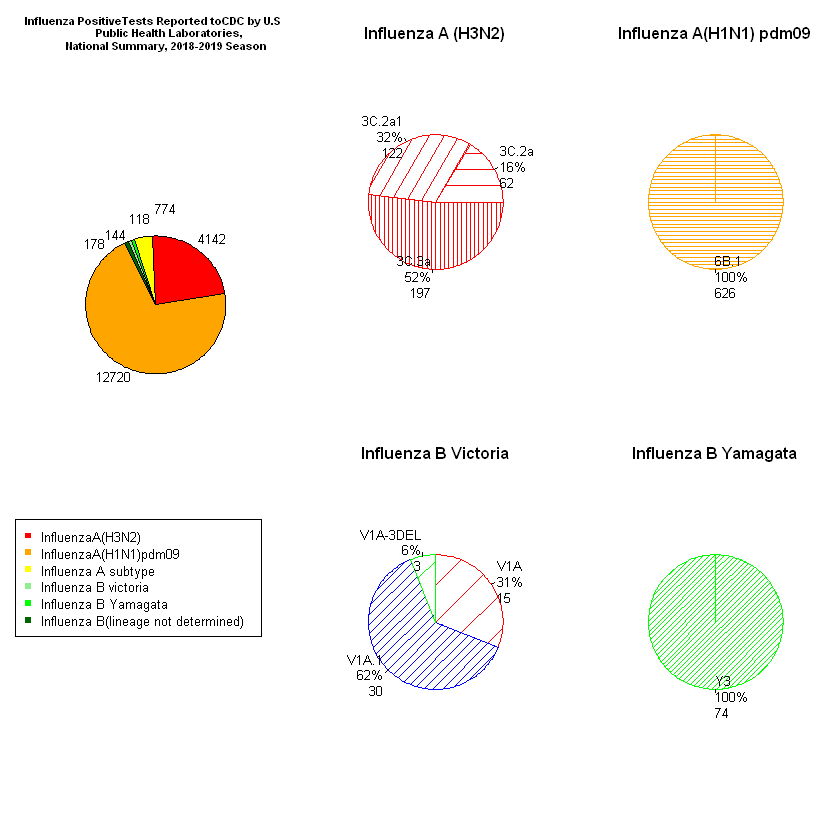

In [11]:
layout(matrix(c(1,1,2,3,4,5), 2, 3, byrow = F))
########################################################
########################################################
lbls.B <- c("V1A", "V1A.1", "V1A-3DEL")
lbls1.B <- gdata4.B$V4
pct.B <- round(gdata4.B$V4/sum(gdata4.B$V4)*100)
pct.B <- paste(pct.B,"%",sep="")
lbls.B <- paste(lbls.B, pct.B,sep="\n") # add percents to labels
lbls.B <- paste(lbls.B,lbls1.B,sep="\n") # ad % to labels
##########################################################
lbls.A <- c("3C.2a", "3C.2a1", "3C.3a")
lbls1.A <- gdata4.A$V4
pct.A <- round(gdata4.A$V4/sum(gdata4.A$V4)*100)
pct.A <- paste(pct.A,"%",sep="")
lbls.A <- paste(lbls.A, pct.A,sep="\n") # add percents to labels
lbls.A <- paste(lbls.A,lbls1.A,sep="\n") # ad % to labels
##########################################################
lbls.Y <- c("Y3")
lbls1.Y <- gdata4.Y$V4
pct.Y <- round(gdata4.Y$V4/sum(gdata4.Y$V4)*100)
pct.Y <- paste(pct.Y,"%",sep="")
lbls.Y <- paste(lbls.Y, pct.Y,sep="\n") # add percents to labels
lbls.Y <- paste(lbls.Y,lbls1.Y,sep="\n") # ad % to labels
##########################################################
lbls.P <- c("6B.1")
lbls1.P <- gdata4.P$V4
pct.P <- round(gdata4.P$V4/sum(gdata4.P$V4)*100)
pct.P <- paste(pct.P,"%",sep="")
lbls.P <- paste(lbls.P, pct.P,sep="\n") # add percents to labels
lbls.P <- paste(lbls.P,lbls1.P,sep="\n") # ad % to labels
##########################################################
#=========================================================
 plot(0,xlim=c(3,3),ylim=c(1,4),type="n",axes=F,xlab="",ylab="",main="Influenza PositiveTests Reported toCDC by U.S.
          Public Health Laboratories,
        National Summary, 2018-2019 Season",cex.main=0.8)
 bisect.angles<-floating.pie(3,3,gdata4.1,col=c("orange","red","yellow","green","lightgreen","darkgreen")
                            ,radius=1,startpos=90)
 pie.labels(3,3,bisect.angles,labels = gdata4.1,minangle=0.30,explode=c(0.01,0.04,0.09,0.05))
#pie(gdata4.1,clockwise=T,col=c("orange","red","yellow","green","lightgreen","darkgreen"),labels=gdata4.1,
#    main="Influenza Positive Tests Reported to CDC by U.S.
#          Public Health Laboratories,
#        National Summary, 2018-2019 Season", edges = 200,radius =1.1,cex=0.7 )
par(xpd=TRUE)

legend(1,2, c("InfluenzaA(H3N2)", "InfluenzaA(H1N1)pdm09",
             "Influenza A subtype","Influenza B victoria",
             "Influenza B Yamagata","Influenza B(lineage not determined)"),
        pch=15,col=c("red", "orange","yellow","lightgreen","green","darkgreen"),cex=1)
#--------------------------------------------------------------------
pie(gdata4.A$V4,labels = lbls.A, col=c("red"),
   main="Influenza A (H3N2)",density=c(8,10,30),angle=c(0,60,90))
#--------------------------------------------------------------------
pie(gdata4.B$V4,labels = lbls.B, col=c("red","blue","green"),
   main="Influenza B Victoria",density=c(5,20,3),clockwise=T)
#--------------------------------------------------------------------
pie(gdata4.P$V4,labels = lbls.P, col=c("orange"),
   main="Influenza A(H1N1) pdm09",density=c(35),angle=c(0),clockwise=T) 
#--------------------------------------------------------------------
pie(gdata4.Y$V4,labels = lbls.Y, col=c("green"),
   main="Influenza B Yamagata",density=c(35),clockwise=T) 

## GRAPH 4

In [7]:
gdata5 <- read.csv("Weekly.csv",header=T)
gdata5.n <- gdata5 %>% separate(WEEK.NUMBER, c("YEAR", "WEEK"))
gdata5.new <- mutate(gdata5.n,YEAR_WEEK1=paste(YEAR, sprintf(WEEK),sep=""))
a  <- sum(subset(gdata5.new$NO..OF.DEATHS,((gdata5.new$YEAR ==2015|gdata5.new$YEAR ==2016 & gdata5.new$WEEK<=39))))
b  <- sum(subset(gdata5.new$NO..OF.DEATHS,((((gdata5.new$YEAR ==2016& gdata5.new$WEEK>39)|(gdata5.new$YEAR ==2017 & gdata5.new$WEEK<=39))))))
c  <- sum(subset(gdata5.new$NO..OF.DEATHS,((((gdata5.new$YEAR ==2017& gdata5.new$WEEK>39)|(gdata5.new$YEAR ==2018 & gdata5.new$WEEK<=39))))))
d  <- sum(subset(gdata5.new$NO..OF.DEATHS,((((gdata5.new$YEAR ==2018& gdata5.new$WEEK>39)|(gdata5.new$YEAR ==2019 & gdata5.new$WEEK<=39))))))
gdata5.new$YEAR_WEEK <- as.numeric(gdata5.new$YEAR_WEEK)
#gdata5.new$YEAR_WEEK <- as.factor(gdata5.new$YEAR_WEEK)
gdat <- data.frame(rbind(gdata5.new$PREVIOUS.WEEK.DEATHS,gdata5.new$CURRENT.WEEK.DEATHS))
week =  gdata5.new$YEAR_WEEK[seq(1, length(gdata5.new$YEAR_WEEK[1:180]), 6) ]

print(d)


[1] 41


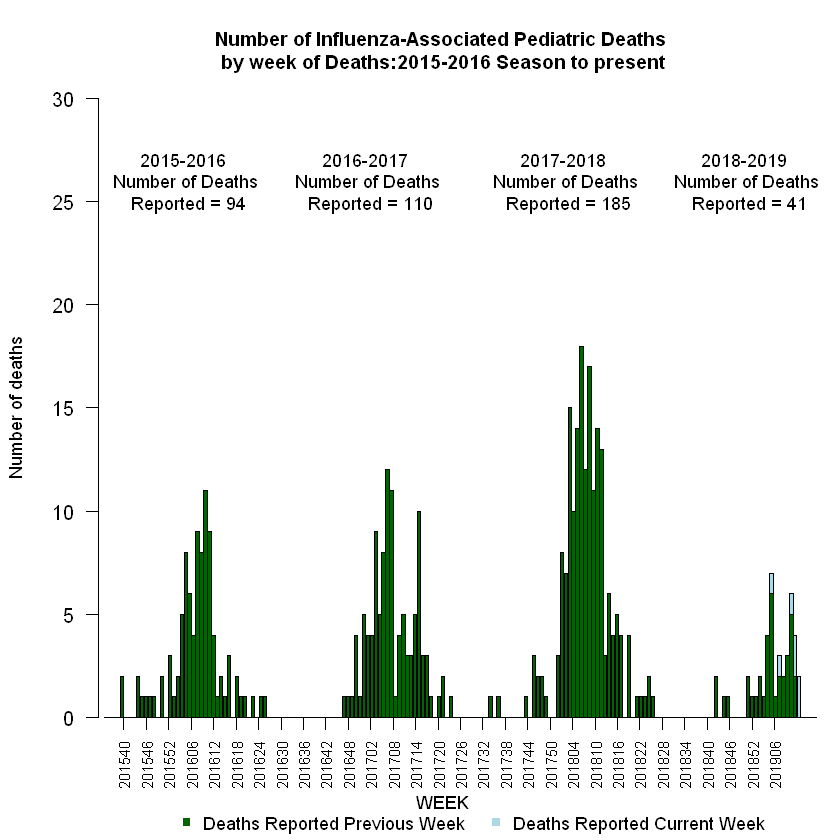

In [12]:
plt <-barplot(as.matrix(gdat[1:180]),
           main="Number of Influenza-Associated Pediatric Deaths 
by week of Deaths:2015-2016 Season to present",
                    ylab = "Number of deaths",xlab="WEEK",
                    beside=F, col=c("darkgreen","lightblue"),cex.main=0.95,
                    las =1,ylim=c(0,30),xlim=c(6,200),col.axis="white",cex.lab=0.88)
axis(1,at= seq(6,205,6.8),adj=1,col="black",col.axis="black",col.ticks="black",las=2,labels=week,cex.axis=0.75)
axis(2,adj=1, col="black",col.ticks="black",las=1,labels=T)
par(xpd=TRUE)
legend(20,-4,c("Deaths Reported Previous Week", "Deaths Reported Current Week"), 
       pch = 15,col=c("darkgreen","lightblue"),horiz=T,cex=0.88,bty="n")
lbls.1 <- paste("2015-2016 \n Number of Deaths \n Reported =",a)
text(25, 26, lbls.1,cex=0.9)
lbls.2 <- paste("2016-2017 \n Number of Deaths \n Reported =",b)
text(80, 26, lbls.2,cex=0.9)
lbls.3 <- paste("2017-2018 \n Number of Deaths \n Reported =",c)
text(140, 26, lbls.3,cex=0.9)
lbls.4 <- paste("2018-2019 \n Number of Deaths \n Reported =",d)
text(195, 26, lbls.4,cex=0.9)

## GRAPH 5

In [61]:
gdata6 <- read.csv("StateDatabyWeekforMap_2018-19week4-4.csv",header =T)
gdata6$ACTIVITY.LEVEL_1 <- factor(gdata6$ACTIVITY.LEVEL.LABEL, levels = rev(levels(gdata6$ACTIVITY.LEVEL.LABEL)))
gdata6.new <- gdata6 %>% separate(ACTIVITY.LEVEL, c("LEVEL", "NO"))
gdata6.new$NO <- as.numeric(gdata6.new$NO)
colnames(gdata6.new)[which(names(gdata6.new) == "STATENAME")] <- "region"
gdata6.new$region <- tolower(gdata6.new$region)
#gdata6
#sapply(gdata6.new,class)

In [62]:
m <- (urbnmapr::states)
colnames(m)[which(names(m) == "state_name")] <- "region"
m$region <- as.character(m$region)
m$region <- tolower(m$region)
ab1 <- merge(x=gdata6.new, y=m, by.x=c("region"), by.y=c("region"), all.x=TRUE)
#sapply(ab1,class)
dim(ab1)

[1] 83936    18

In [63]:
plt6 <- ggplot(ab1,aes(x=long,y=lat,group=group))+
        geom_polygon(aes(fill=NO),size=1)+
        geom_path(colour='black')+
        coord_map(projection = "albers", lat0 = 39, lat1 = 45)+
        #scale_fill_gradient( low = "green",
        #high = "red",na.value = "white")+
        theme_bw() +
        theme(axis.line = element_line(colour = "white"),
              axis.text= element_blank(),
              axis.title=element_blank(),
              axis.ticks=element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())+
        scale_fill_gradientn(colors =c("#00ff00","#40ff00","#80ff00","#bfff00","#ffff00","#ffbf00","#ff8000","#ff4000","#ff0000"), 
          labels = c("Minimal", "Minimal","Minimal","Low","Low","moderate", "moderate", "High","High","High"),
           breaks = c(2,3,4,5,6,7,8,9,10,11),guide = guide_colourbar(barwidth =0.6,barheight =8))+labs(fill='ILI ACTIVITY LEVEL') + guides(fill=guide_legend(title="ILI ACTIVITY LEVEL",reverse =T))

Warning message:
"Removed 3 rows containing missing values (geom_path)."

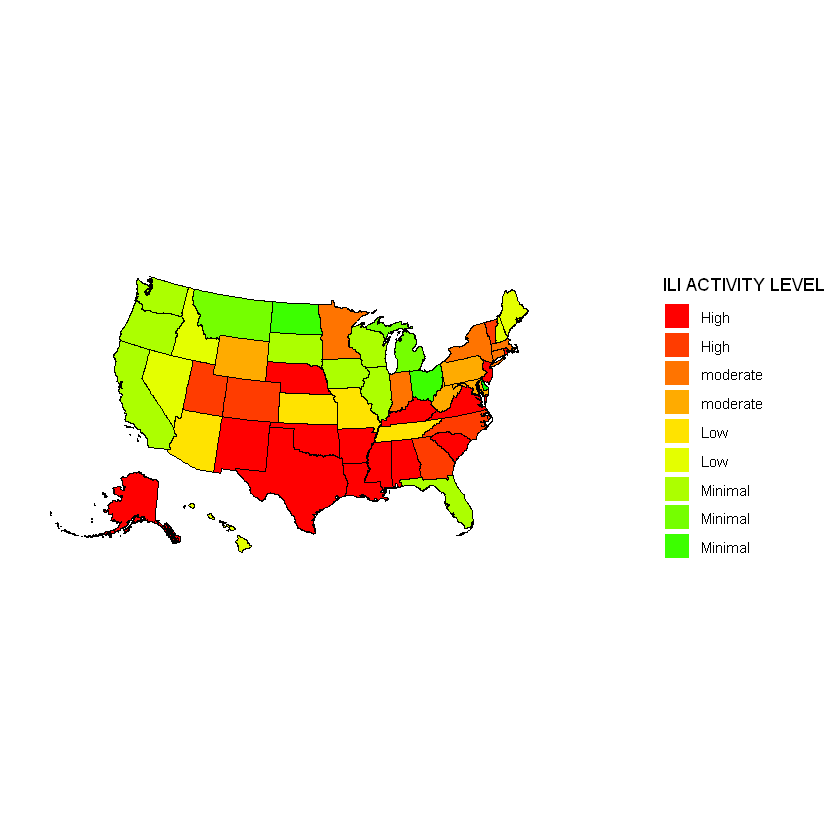

In [64]:
plt6

## GRAPH 6

### YEARLY

In [52]:
graph7 = read.csv("Yearly_Graph6.csv",header = TRUE)
gdata7 <- mutate(graph7,YEAR_WEEK=paste(YEAR, sprintf("%02d",WEEK),sep=""))
gdata7 <- subset(gdata7,(YEAR_WEEK>=201806 & YEAR_WEEK <=201904))
gdata7.new <- subset(gdata7, select=c("TOTAL.A","TOTAL.B","YEAR_WEEK"))
gdata7.neww <- subset(gdata7,select =c("PERCENT.POSITIVE","PERCENT.A","PERCENT.B","YEAR_WEEK"))
gdata7.new1 <- melt(gdata7.new,id.var="YEAR_WEEK")
gdata7.neww1 <- melt(gdata7.neww,id.var ="YEAR_WEEK")
#graph7

In [21]:
A_max = max(gdata7$TOTAL.A, na.rm = TRUE)
print(A_max)
Per_max = max(gdata7$PERCENT.POSITIVE, na.rm = TRUE)
scale.point = (A_max/Per_max)-120
print(scale.point)
plt7 = ggplot(gdata7,aes(x=YEAR_WEEK)) +
  geom_col(data=gdata7.new1,aes(y=value,fill=variable),color="black") +
  scale_x_discrete(expand=c(0,0))+
  scale_y_continuous(name = expression("Number of Positive Specimen"),
                     breaks = (seq(0,A_max+10000,by=1000)),
                     expand=c(0,0),sec.axis = sec_axis(~.*1/scale.point,name = "Percent Positive"),limits=c(0,A_max+10000))+
  geom_line(aes(y=as.numeric((PERCENT.POSITIVE)*scale.point),group=1,color="Percent Positive"),linetype="solid",stat="identity", size=1)+
  geom_line(aes(y=as.numeric((PERCENT.A)*scale.point),group=1,color="% Positive Flu A"),linetype="dashed",stat="identity", size=0.6)+
  geom_line(aes(y=as.numeric((PERCENT.B)*scale.point),group=1,color="% Positive Flu B"),linetype="dotted",stat="identity", size=1)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(color = "black"),
        legend.position=c(0.85,0.8),legend.box="vertical",legend.title = element_blank(),
        legend.background = element_rect(fill="white",size=2),legend.text=element_text(size=8,face="bold"),
        axis.text.x = element_text(size=7,angle=90, hjust=1,face="bold"),
        axis.text.y = element_text(face="bold"),
        plot.title = element_text(size = 10, face = "bold", hjust=0.5))+
  scale_color_manual(name=c("% Positive Flu A","% Positive Flu B","Percent Positive"),values=c("red","blue","black"))+
  scale_fill_manual(name=c("A","B"),values=c("yellow","green"))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
National Summary, 2018-2019 Season",
      x="WEEK", caption="Source: CDC.gov")+
theme(plot.margin=unit(c(1,1,1.5,1),"cm"))

[1] 14116
[1] 402.8516


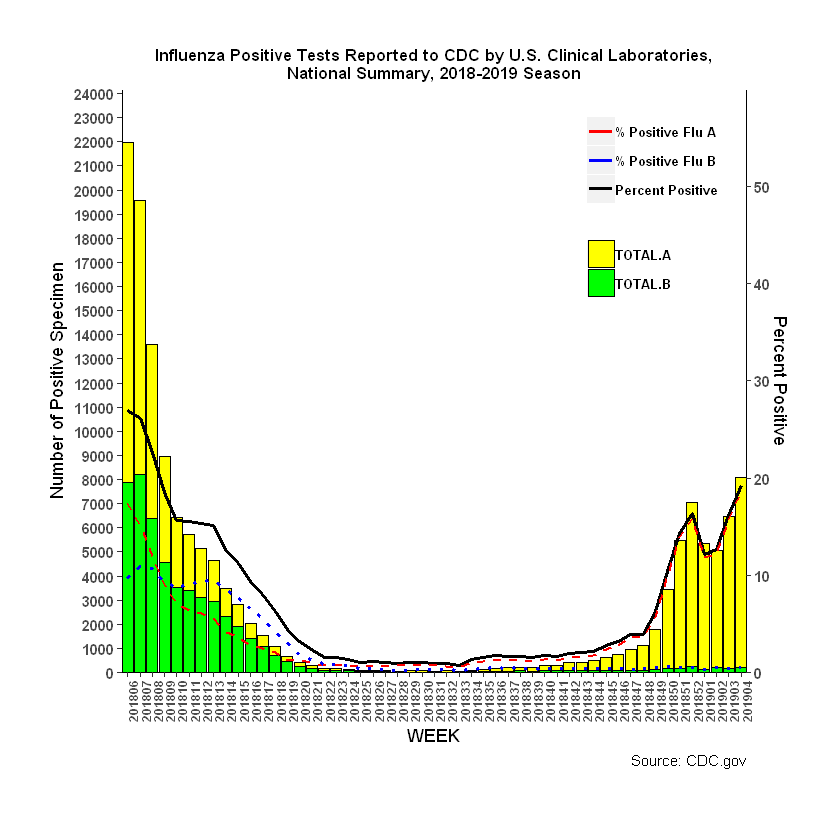

In [22]:
plt7

## GRAPH 7

In [3]:
gdata8 <- read.csv("Yearly_Graph7.csv",header=T)
gdata8.new <- mutate(gdata8,YEAR_WEEK=paste(YEAR, sprintf("%02d",WEEK),sep=""))
gdata8.new <- subset(gdata8.new,(YEAR_WEEK<=201904))
gdata8.temp <- subset(gdata8.new, select=c("A..Subtyping.not.Performed.", "A..2009.H1N1.", "A..H3.","B","BVic","BYam","H3N2v","YEAR_WEEK"))
gdata8.new1 <- melt(gdata8.temp,id.var="YEAR_WEEK")

In [4]:
plt8 <- ggplot(gdata8.new1,aes(x=YEAR_WEEK,y=value,fill=variable))+ 
        scale_x_discrete(expand=c(0,0))+
        scale_y_continuous(name = expression("number of positive specimen"),
                           breaks = seq(0,5000, by = 500),expand=c(0,0),limit=c(0,4500))+
        geom_bar(color="black",stat="identity")+
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(color = "black"),
        legend.position=c(0.9,0.8),legend.box="vertical",legend.title = element_blank(),
        legend.background = element_rect(fill="white",size=2),legend.text=element_text(size=8,face="bold"),
        axis.text.x = element_text(size=7,angle=90, hjust=1,face="bold"),
        axis.text.y = element_text(face="bold"),
        plot.title = element_text(size = 10, face = "bold", hjust=0.5))+
        scale_fill_manual(name=c("A","A(H1N1)2009","A(H3N2)","B","B(Victoria)","B(yamagata)","H3N2v"),
                          values=c("yellow","orange","red","darkgreen","lightgreen","green","violet"))+
        labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,
        National Summary, 2018-2019 Season",
      x="WEEK", caption="Source: CDC.gov")+
       theme(plot.margin=unit(c(1,1,1.5,3),"cm"))

In [6]:
gdata8

REGION.TYPE,REGION,YEAR,WEEK,TOTAL.SPECIMENS,A..2009.H1N1.,A..H3.,A..Subtyping.not.Performed.,B,BVic,BYam,H3N2v
National,X,2018,6,6492,544,2040,32,329,113,931,0
National,X,2018,7,5508,495,1511,24,251,115,931,0
National,X,2018,8,4546,306,1073,19,245,116,891,0
National,X,2018,9,3580,246,588,12,204,88,699,0
National,X,2018,10,3057,144,411,25,172,88,646,0
National,X,2018,11,2529,188,277,25,174,70,542,0
National,X,2018,12,2248,120,234,10,129,52,467,0
National,X,2018,13,1965,132,220,8,107,62,455,0
National,X,2018,14,1906,120,163,7,72,54,405,0
National,X,2018,15,1481,101,102,2,54,40,297,0


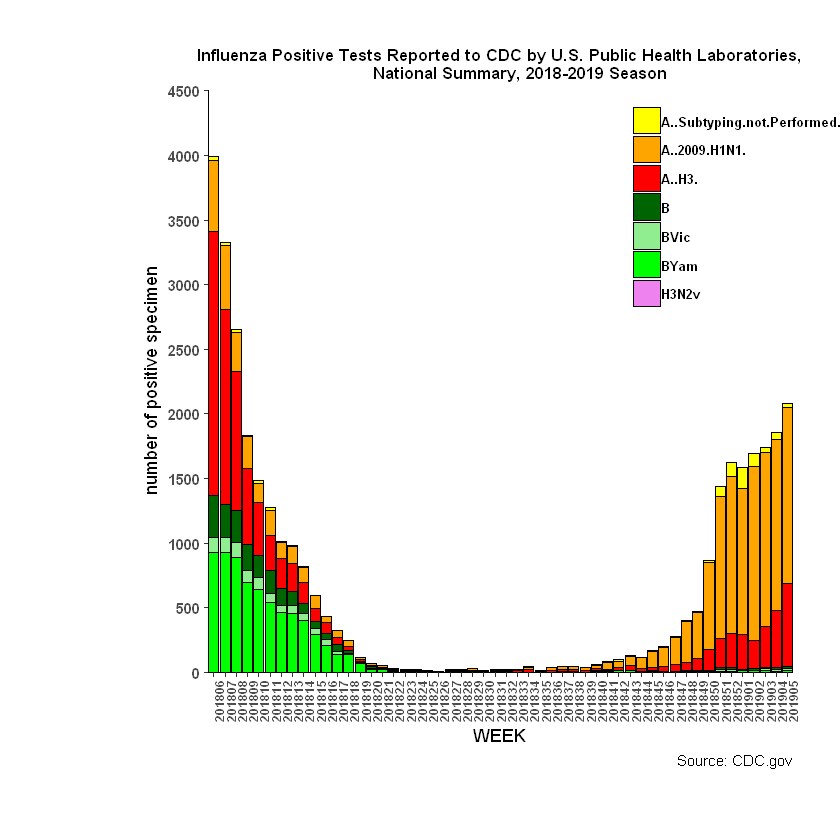

In [5]:
plt8

## GRAPH 8

### NEWYORK

In [5]:
graph9 = read.csv("GRAPH1_NY_YEARLY.csv",header = TRUE)
gdata9 <- mutate(graph9,YEAR_WEEK=paste(YEAR, sprintf("%02d",WEEK),sep=""))
gdata9 <- subset(gdata9,(YEAR_WEEK>=201805 & YEAR_WEEK <=201904))
gdata9.new <- subset(gdata9, select=c("TOTAL.A", "TOTAL.B", "YEAR_WEEK"))
gdata9.new1 <- melt(gdata9.new,id.var="YEAR_WEEK")
#head(gdata9.new1)

In [8]:
A_max = max(gdata9$TOTAL.A, na.rm = TRUE)
print(A_max)
Per_max = max(gdata9$PERCENT.POSITIVE, na.rm = TRUE)
scale.point = (A_max/Per_max)-20
print(scale.point)
plt9 <- ggplot(gdata9,aes(x=YEAR_WEEK)) +
  geom_bar(data=gdata9.new1,aes(x=YEAR_WEEK,y=value,fill=variable),stat="identity",color="black") + 
  scale_x_discrete(expand=c(0,0))+
  scale_y_continuous(name = expression("Number of Positive Specimen"),
                    expand=c(0,0),sec.axis = sec_axis(~.*1/scale.point,name = "Percent Positive"),limits=c(0,A_max+2000))+
  geom_line(aes(y=as.numeric((PERCENT.POSITIVE)*scale.point),group=1,color="Percent Positive"),linetype="solid",stat="identity", size=1)+
  geom_line(aes(y=as.numeric((PERCENT.A)*scale.point),group=1,color="% Positive Flu A"),linetype="dashed",stat="identity", size=0.6)+
  geom_line(aes(y=as.numeric((PERCENT.B)*scale.point),group=1,color="% Positive Flu B"),linetype="dotted",stat="identity", size=1)+
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(color = "black"),
        legend.position=c(0.85,0.8),legend.box="vertical",legend.title = element_blank(),
        legend.background = element_rect(fill="white",size=2),legend.text=element_text(size=8,face="bold"),
        axis.text.x = element_text(size=7,angle=90, hjust=1,face="bold"),
        axis.text.y = element_text(face="bold"),
        plot.title = element_text(size = 10, face = "bold", hjust=0.5))+
  scale_color_manual(name=c("% Positive Flu A","% Positive Flu B","Percent Positive"),values=c("red","blue","black"))+
  scale_fill_manual(name=c("A","B"),values=c("yellow","green"))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,
National Summary, 2018-2019 Season",
      x="WEEK", caption="Source: CDC.gov")+
theme(plot.margin=unit(c(1,1,1.5,1),"cm"))

[1] 1513
[1] 26.11399


#### plt9

## Saving images to disk

In [70]:
jpeg('rplot.jpg')
plt2
dev.off()

png 
  2

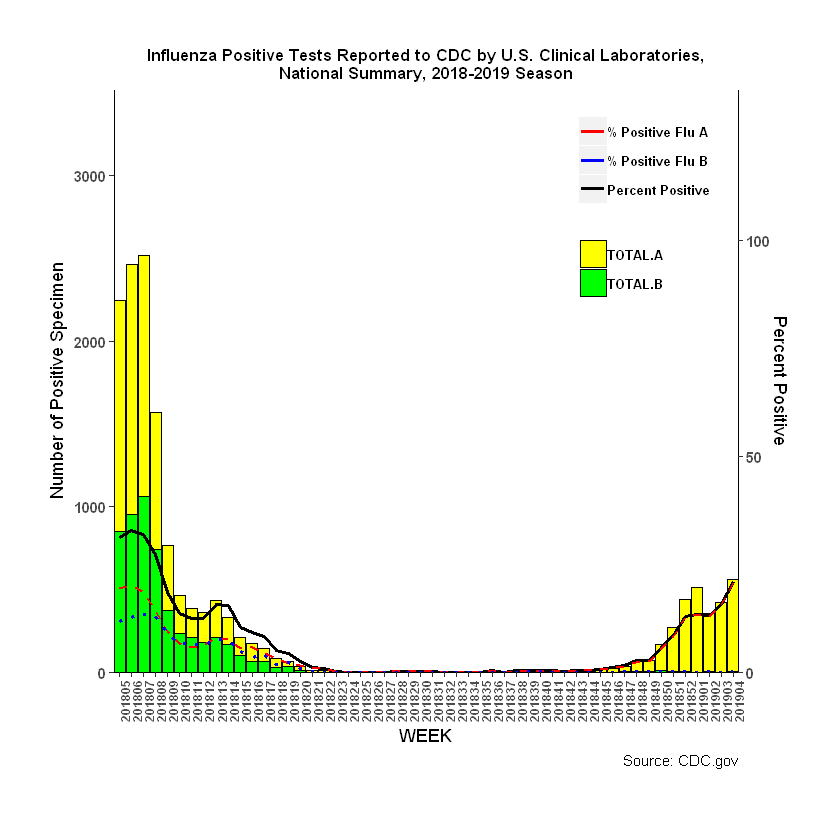

In [9]:
plt9